# **Modelagem Matemática na Quarentena**
**módulo 2 - modelos epidemiológicos**

###**Carregando os pacotes necessários**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math # pacote com as funções matemáticas
from scipy.integrate import odeint, solve_ivp # pacote para resolução de euações diferenciais

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**Modelo de Crescimento Exponencial**

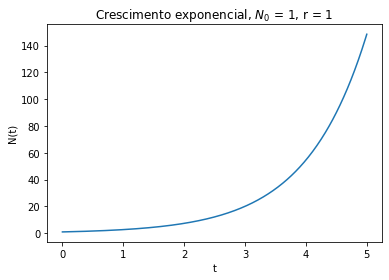

In [2]:
r = 1; N0 = 1;
a = 0; b = 5; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
plt.plot(t, N0 * np.exp(r * t))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Crescimento exponencial, $N_0$ = {0:.0f}, r = {1:.0f}".format(N0, r))
plt.show()

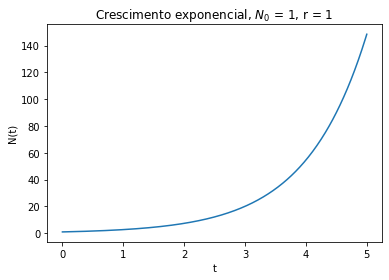

In [3]:
# Modelo crescimento exponencial - usando função 'odeint'
r = 1; N0 = N = 1;
def deriv(y, t, N, r):
    N = y
    dNdt = r * N
    return dNdt

y0 = N0
ret = odeint(deriv, y0, t, args=(N, r))
N = ret.T[0]

plt.plot(t, N, label = "N")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Crescimento exponencial, $N_0$ = {0:.0f}, r = {1:.0f}".format(N0, r))
plt.show()

###**Modelo de Crescimento Logístico**

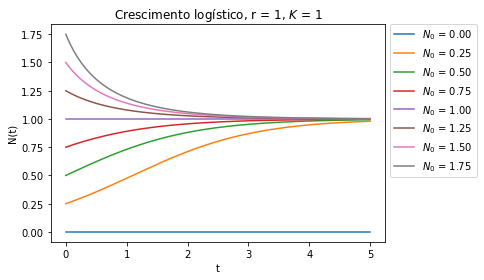

In [4]:
r = 1; K = 1;
a = 0; b = 5; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 1.75; i = 0.25
ax = plt.subplot(111)
for N0 in np.linspace(a, b, int(1 + (b - a) / i)):
  N = (N0 * K) / (N0 + (K - N0) * np.exp(-r * t))
  ax.plot(t, N, label = r'$N_0$ = {0:.2f}'.format(N0))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Crescimento logístico, r = {0:.0f}, $K$ = {1:.0f}".format(r, K))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.65))
plt.show()

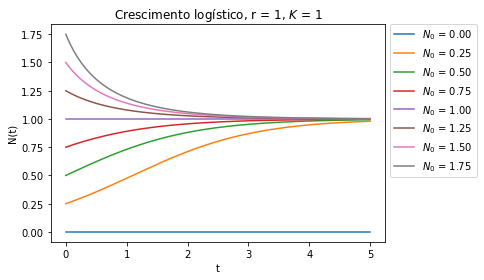

In [5]:
# Modelo crescimento logístico - usando função 'odeint'
def deriv(y, t, N, r):
    N = y
    dNdt = r * (1 - N / K) * N
    return dNdt

r = 1; K = 1;
a = 0; b = 5; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 1.75; i = 0.25
ax = plt.subplot(111)
for N0 in np.linspace(a, b, int(1 + (b - a) / i)):
  y0 = N0
  ret = odeint(deriv, y0, t, args=(N, r))
  N = ret.T[0]
  ax.plot(t, N, label = r'$N_0$ = {0:.2f}'.format(N0))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title(r"Crescimento logístico, r = {0:.0f}, $K$ = {1:.0f}".format(r, K))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.65))
plt.show()

###**Modelo SI**

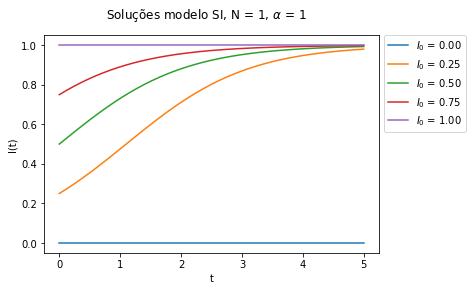

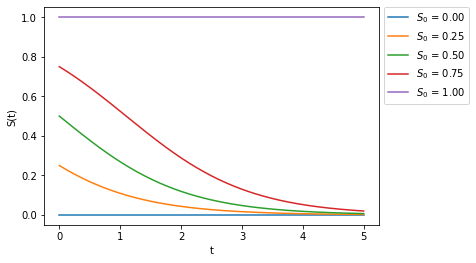

In [6]:
fig, axs = plt.subplots(2)
N = 1; alpha = 1;
fig.suptitle(r"Soluções modelo SI, N = {0:.0f}, $\alpha$ = {1:.0f}".format(N, alpha))

# I0
a = 0; b = 5; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 1; i = 0.25
ax = plt.subplot(111)
for I0 in np.linspace(a, b, int(1 + (b - a) / i)):
  I = (I0 * N) / (I0 + (N - I0) * np.exp(- alpha * N * t))
  ax.plot(t, I, label = r'$I_0$ = {0:.2f}'.format(I0))
plt.xlabel("t")
plt.ylabel("I(t)")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.78))
plt.show()

# S0
a = 0; b = 5; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 1; i = 0.25
ax = plt.subplot(111)
for S0 in np.linspace(a, b, int(1 + (b - a) / i)):
  I = (S0 * N) / (S0 + (N - S0) * np.exp(alpha * N * t))
  ax.plot(t, I, label = r'$S_0$ = {0:.2f}'.format(S0))
plt.xlabel("t")
plt.ylabel("S(t)")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.78))
plt.show()

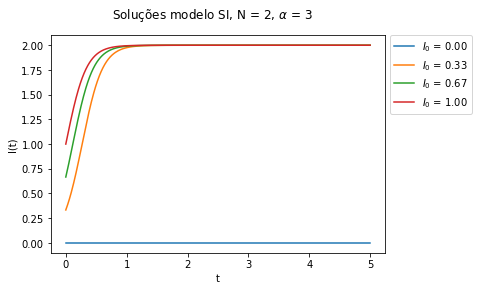

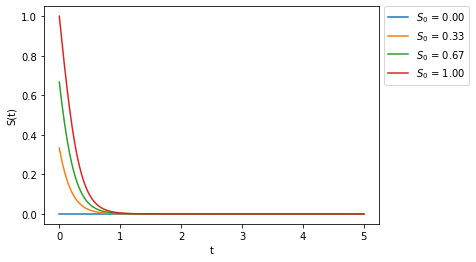

In [7]:
# solução do modelo SI - usando a função 'odeint'
fig, axs = plt.subplots(2)
N = 2; alpha = 3;
fig.suptitle(r"Soluções modelo SI, N = {0:.0f}, $\alpha$ = {1:.0f}".format(N, alpha))

# I0
a = 0; b = 5; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 1; i = 1/3
ax = plt.subplot(111)
for I0 in np.linspace(a, b, int(1 + (b - a) / i)):
  I = (I0 * N) / (I0 + (N - I0) * np.exp(- alpha * N * t))
  ax.plot(t, I, label = r'$I_0$ = {0:.2f}'.format(I0))
plt.xlabel("t")
plt.ylabel("I(t)")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.82))
plt.show()

# S0
a = 0; b = 5; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))
a = 0; b = 1; i = 1/3
ax = plt.subplot(111)
for S0 in np.linspace(a, b, int(1 + (b - a) / i)):
  I = (S0 * N) / (S0 + (N - S0) * np.exp(alpha * N * t))
  ax.plot(t, I, label = r'$S_0$ = {0:.2f}'.format(S0))
plt.xlabel("t")
plt.ylabel("S(t)")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.82))
plt.show()

### **Modelo SIR**

*Modelo SIR - igual apresentado pela professora*

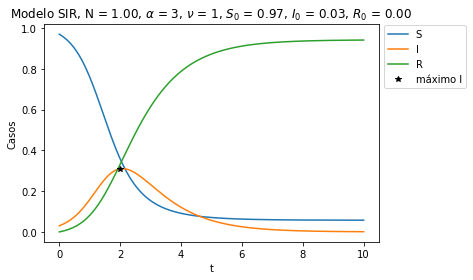

In [8]:
N = 1; I0 = 0.03; R0 = 0; S0 = N - I0 - R0;
alpha = 3; nu = 1;
a = 0; b = 10; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))

# Modelo SIR
def deriv(y, t, N, alpha, nu):
    S, I, R = y
    dSdt = -alpha * I * S
    dIdt = alpha * I * S - nu * I
    dRdt = nu * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, alpha, nu))
S, I, R = ret.T

ax = plt.subplot(111)
ax.plot(t, S, label = "S")
ax.plot(t, I, label = "I")
ax.plot(t, R, label = "R")

Imax = I0 + S0 - (nu / alpha) * np.log(S0) - (nu / alpha) + (nu / alpha) * np.log(nu / alpha)
Smax = N * (nu / alpha)

plt.plot(2, Imax, "*", color = "black", label = "máximo I")
plt.xlabel("t")
plt.ylabel("Casos")
plt.title(r"Modelo SIR, N = {0:.2f}, $\alpha$ = {1:.0f}, $\nu$ = {2:.0f}, $S_0$ = {3:.2f}, $I_0$ = {4:.2f}, $R_0$ = {5:.2f}".format(N, alpha, nu, S0, I0, R0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

In [9]:
print(f'O número máximo de infectados é {Imax:.2f} e o pico de sobreviventes ocorre com {Smax:.2f}.')

O número máximo de infectados é 0.31 e o pico de sobreviventes ocorre com 0.33.


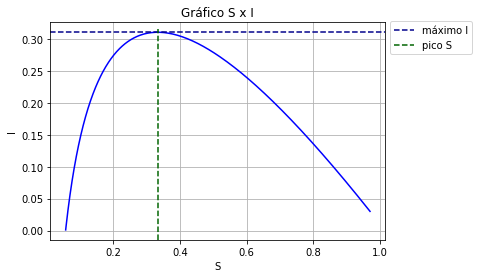

In [10]:
ax = plt.subplot(111)
ax.plot(S, I, color = 'blue')
ax.axhline(y = Imax, xmin = 0, xmax = max(t), color = "darkblue", label = "máximo I", linestyle = '--')
ax.axvline(x = Smax, ymin = 0, ymax = max(S), color = "darkgreen", label = "pico S", linestyle = '--')
plt.xlabel("S")
plt.ylabel("I")
plt.grid()
plt.title("Gráfico S x I")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.93))
plt.show()

*Modelo SIR - com a variação*

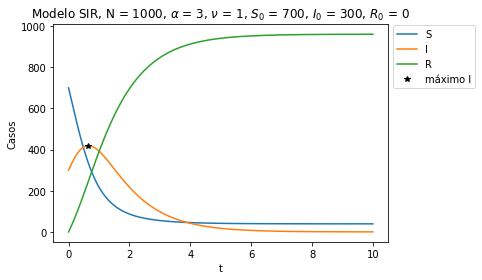

In [11]:
N = 1000; I0 = 300; R0 = 0; S0 = N - I0 - R0;
alpha = 3; nu = 1;
a = 0; b = 10; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))

# Modelo SIR
def deriv(y, t, N, alpha, nu):
    S, I, R = y
    dSdt = -(alpha  / N) * I * S
    dIdt = (alpha / N) * I * S - nu * I
    dRdt = nu * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, alpha, nu))
S, I, R = ret.T

ax = plt.subplot(111)
ax.plot(t, S, label = "S")
ax.plot(t, I, label = "I")
ax.plot(t, R, label = "R")

Imax = I0 + S0 - ((nu * N) / alpha) * np.log(S0) - ((nu * N) / alpha) + ((nu * N) / alpha) * np.log((nu * N) / alpha)
Smax = N * (nu / alpha)

plt.plot(0.65, Imax, "*", color = "black", label = "máximo I")
plt.xlabel("t")
plt.ylabel("Casos")
plt.title(r"Modelo SIR, N = {0:.0f}, $\alpha$ = {1:.0f}, $\nu$ = {2:.0f}, $S_0$ = {3:.0f}, $I_0$ = {4:.0f}, $R_0$ = {5:.0f}".format(N, alpha, nu, S0, I0, R0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

In [12]:
print(f'O número máximo de infectados é {Imax:.0f} e o pico de sobreviventes ocorre com {Smax:.0f}.')

O número máximo de infectados é 419 e o pico de sobreviventes ocorre com 333.


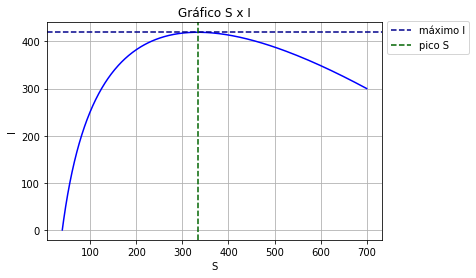

In [13]:
ax = plt.subplot(111)
ax.plot(S, I, color = 'blue')
ax.axhline(y = Imax, xmin = 0, xmax = max(t), color = "darkblue", label = "máximo I", linestyle = '--')
ax.axvline(x = Smax, ymin = 0, ymax = max(S), color = "darkgreen", label = "pico S", linestyle = '--')
plt.xlabel("S")
plt.ylabel("I")
plt.grid()
plt.title("Gráfico S x I")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.93))
plt.show()

###**Modelo SIRS**

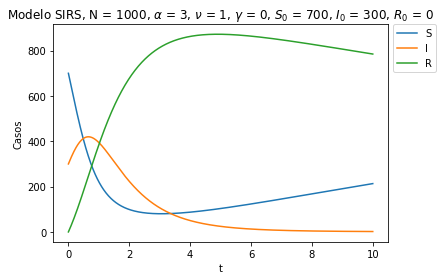

In [14]:
# solução do modelo SIR - usando a função 'odeint'
N = 1000; I0 = 300; R0 = 0; S0 = N - I0 - R0;
alpha = 3; nu = 1; gamma = 0.03;
a = 0; b = 10; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i))

# Modelo SIRS
def deriv(y, t, N, alpha, nu, gamma):
    S, I, R = y
    dSdt = -(alpha / N) * I * S + gamma * R
    dIdt = (alpha / N) * I * S - nu * I
    dRdt = nu * I - gamma * R
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, alpha, nu, gamma))
S, I, R = ret.T

ax = plt.subplot(111)
ax.plot(t, S, label = "S")
ax.plot(t, I, label = "I")
ax.plot(t, R, label = "R")

plt.xlabel("t")
plt.ylabel("Casos")
plt.title(r"Modelo SIRS, N = {0:.0f}, $\alpha$ = {1:.0f}, $\nu$ = {2:.0f}, $\gamma$ = {3:.0f}, $S_0$ = {4:.0f}, $I_0$ = {5:.0f}, $R_0$ = {6:.0f}".format(N, alpha, nu, gamma, S0, I0, R0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.89))
plt.show()

###**Modelo SEIRS**

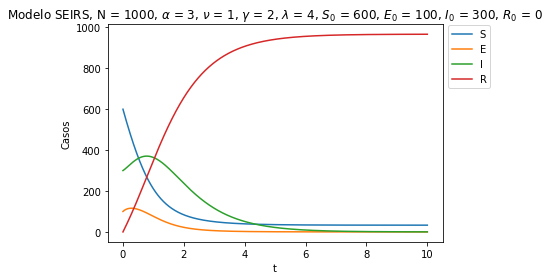

In [15]:
# solução do modelo SEIRS - usando a função 'odeint'
N = 1000; I0 = 300; E0 = 100; R0 = 0; S0 = N - I0 - E0 - R0;
alpha = 3; nu = 1; gamma = 2; lamb = 4;
a = 0; b = 10; i = 0.01
t = np.linspace(a, b, int(1 + (b - a) / i)) # t = np.linspace(0, 160, 160)

# Modelo SEIRS
def deriv(y, t, N, alpha, nu, gamma, lamb):
    S, E, I, R = y
    dSdt = -(alpha / N) * I * S
    dEdt = (alpha / N) * I * S - lamb * E
    dIdt = lamb * E - nu * I
    dRdt = nu * I
    return dSdt, dEdt, dIdt, dRdt

y0 = S0, E0, I0, R0
ret = odeint(deriv, y0, t, args=(N, alpha, nu, gamma, lamb))
S, E, I, R = ret.T

ax = plt.subplot(111)
ax.plot(t, S, label = "S")
ax.plot(t, E, label = "E")
ax.plot(t, I, label = "I")
ax.plot(t, R, label = "R")

plt.xlabel("t")
plt.ylabel("Casos")
plt.title(r"Modelo SEIRS, N = {0:.0f}, $\alpha$ = {1:.0f}, $\nu$ = {2:.0f}, $\gamma$ = {3:.0f}, $\lambda$ = {4:.0f}, $S_0$ = {5:.0f}, $E_0$ = {6:.0f}, $I_0$ = {7:.0f}, $R_0$ = {8:.0f}".format(N, alpha, nu, gamma, lamb, S0, E0, I0, R0))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()